<a href="https://colab.research.google.com/github/MonishSoundarRaj/data_check_generator/blob/main/comparing_with_syn_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn
import pandas as pd
from datetime import datetime
from collections import Counter, defaultdict
import json
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
bw_df = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_blue_waters.csv")
mira_df_2 = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_mira.csv")
hl_df = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_helios.csv")
philly_df = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_philly.csv")
sc_df = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_supercloud.csv")
th_df = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_theta.csv")
th_gpu_df = pd.read_csv("/content/drive/My Drive/data_clusters_u/data_thetagpu.csv")
# Syn_data_below
bw_syn_df = pd.read_csv("./data_bw_cgs.csv")
mira_syn_df = pd.read_csv("./data_mira_cgs.csv")
philly_syn_df = pd.read_csv("./data_philly_cgs.csv")
helios_syn_df = pd.read_csv("./data_helios_cgs.csv")
sc_syn_df = pd.read_csv("./data_sc_cgs.csv")
th_syn_df = pd.read_csv("./data_theta_cgs.csv")
th_gpu_syn_df = pd.read_csv("./data_thgpu_cgs.csv")

In [ ]:
columns=["job", "user", "project", "state", "gpu_num", "cpu_num", "node_num",  "run_time", "wall_time", "new_status", "interval"]

In [3]:
bw_syn_df.head()

,Unnamed: 0,job,user,project,state,gpu_num,cpu_num,node_num,run_time,wall_time,new_status,interval
0,0,9475594,USER394251U,GRP115889G,0,1,0,4,31323,172410,Pass,47.719130
1,1,9473949,USER280249U,GRP114825G,0,0,157,16,13108,28821,Pass,223.161724
2,2,9473625,USER394251U,GRP120376G,0,1,0,2,75,161601,Pass,118.845807
3,3,9473159,USER299065U,GRP117569G,123,0,2765,2,61,34290,Killed,0.957048
4,4,9467865,USER349493U,GRP119585G,171,0,62,10,16017,33517,Killed,1.722046


In [4]:
mira_syn_df.head()

,Unnamed: 0,job,user,project,state,gpu_num,cpu_num,node_num,run_time,wall_time,new_status,interval
0,0,0,35913651315689,10997024788932,0,0,8260.740580,2044.092891,134.069727,3657.766041,Pass,242.340542
1,1,1,42848065133320,79111706817147,124,0,8233.399313,1041.522581,3725.482189,15393.125625,Killed,16.953884
2,2,2,35692763756902,35228878699706,0,0,8194.218780,516.158369,905.974246,3703.075642,Pass,68.585807
3,3,3,53672893077337,23560156591908,858,0,32866.924117,1021.606957,2589.567148,7008.921450,Killed,74.867994
4,4,4,35170777111406,96022483660699,0,0,8304.596301,517.330509,3686.184429,1513.485804,Pass,32.103824


In [5]:
philly_syn_df.head()

,Unnamed: 0,job,user,project,state,gpu_num,cpu_num,node_num,run_time,wall_time,core_hour,interval
0,0,sdv-pii-2t6bc,b22530,6214e9,Killed,2,0,2,846734.762608,0,3.677922e+02,1.700805e+01
1,1,sdv-pii-kts74,d1948b,11cb48,Pass,2,0,2,194.290618,0,4.425872e+01,5.128764e+02
2,2,sdv-pii-xcyd8,066e99,11cb48,Failed,2,0,2,56.882124,0,6.460449e+01,5.468900e+02
3,3,sdv-pii-o13ak,fac375,6c71a0,Killed,2,0,2,202.671557,0,6.392584e+02,1.955774e+01
4,4,sdv-pii-tilzj,a03d7f,6c71a0,Killed,2,0,2,41817.029153,0,1.587037e+06,1.702396e-28


In [6]:
helios_syn_df.head()

,Unnamed: 0,job,user,project,state,gpu_num,cpu_num,node_num,run_time,wall_time,core_hour,interval
0,0,0,uaxcW,vcHvQ,Pass,1,1,1,123.634051,0,844918.068695,3.966865
1,1,1,umFLe,vcEwI,Failed,7,1,1,127.472316,0,153.714981,27.956084
2,2,2,uYq3P,vcefl,Failed,8,34,1,98.756148,0,182.943154,13.982225
3,3,3,u4TfD,vcWoR,Pass,1,1,1,1.000000,0,0.001524,5.215681
4,4,4,uTeV6,vcKrE,Failed,1,1,1,118.343956,0,0.001524,201.051399


In [7]:
sc_syn_df.head()

,Unnamed: 0,job,user,project,state,gpu_num,cpu_num,node_num,run_time,wall_time,new_status,interval
0,0,0,87718288239424,0,3,1,20,6,60327,0,Pass,1.449094e+00
1,1,1,51554884524541,0,3,1,20,2,43431,0,Pass,1.360941e+01
2,2,2,54207134732156,0,3,1,11,2,2289,0,Pass,9.173699e-07
3,3,3,50361206020501,0,4,1,4,2,6988,0,Pass,2.630192e-06
4,4,4,51716593853572,0,5,2,20,2,134627,0,Killed,1.349033e+01


In [8]:
th_syn_df.head()

,Unnamed: 0,job,user,project,state,gpu_num,cpu_num,node_num,run_time,wall_time,new_status,interval
0,0,0,9.536262e+12,3.398925e+13,0,0,128.000000,8.172746,61.651559,3574.058407,Failed,804.253962
1,1,1,7.977642e+13,8.131041e+13,0,0,7966.741827,2.000000,1939.392503,3593.678600,Pass,36.009306
2,2,2,8.298257e+12,9.730273e+12,0,0,128.000000,2.000000,549.449771,3569.322933,Failed,115.974265
3,3,3,0.000000e+00,0.000000e+00,0,0,8528.853289,127.037757,9622.877088,10832.617711,Killed,52.754099
4,4,4,3.457643e+13,3.428432e+13,0,0,504.950253,8.172612,3569.023962,3571.524526,Killed,3939.194443


In [9]:
th_gpu_syn_df.head()

,Unnamed: 0,job,user,project,state,gpu_num,cpu_num,node_num,run_time,wall_time,new_status,interval
0,0,0,2.493513e+10,7.235649e+07,0,1.0,0,1.0,365.355946,43200.0,Killed,141.345482
1,1,1,3.073538e+10,2.649807e+10,0,1.0,0,1.0,41661.615140,43200.0,Failed,2.065477
2,2,2,2.177348e+10,0.000000e+00,0,1.0,0,1.0,1887.855772,43200.0,Killed,3.655537
3,3,3,2.740213e+10,6.397891e+09,0,1.0,0,1.0,300.962923,43200.0,Killed,0.034081
4,4,4,2.092425e+10,0.000000e+00,0,1.0,0,1.0,193.203179,43200.0,Killed,58.052071


In [10]:
def plot_cdf(x, bins, xlabel, ylabel="Frequency (%)", color="", linestyle="--"):
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        x = np.sort(x)
        cdf = 100 * np.arange(len(x)) / float(len(x))
        if color:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5, color=color)
        else:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.margins(0)
        plt.ylim(0, 100)
        plt.xlim(10**0, 10**8)
        plt.grid(True)
        plt.style.use("default")

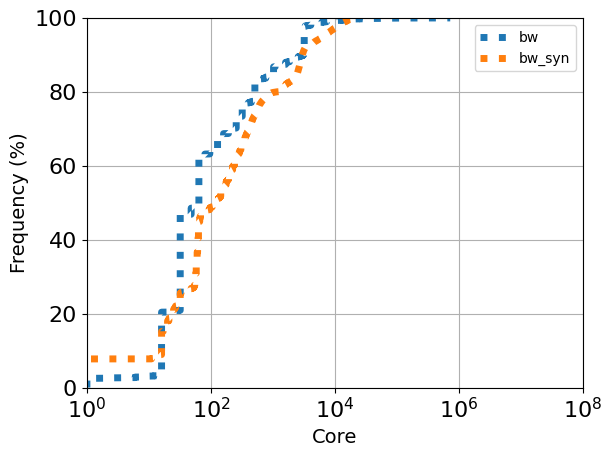

In [11]:
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_df.iterrows()], 100000, "Core", linestyle=":")
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_syn_df.iterrows()], 100000, "Core", linestyle=":")
plt.legend(["bw", "bw_syn"])
plt.xscale("log")
plt.rc('legend',fontsize=23)

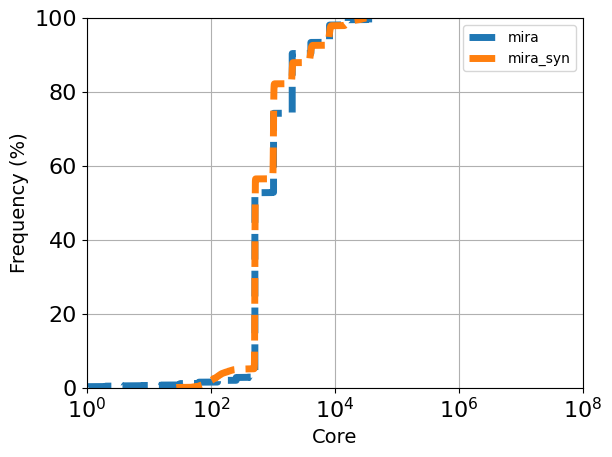

In [12]:
plot_cdf(mira_df_2["node_num"], 100000, "Core", linestyle="--")
plot_cdf(mira_syn_df["node_num"], 100000, "Core", linestyle="--")
plt.legend(["mira", "mira_syn"])
plt.xscale("log")
plt.rc('legend',fontsize=23)

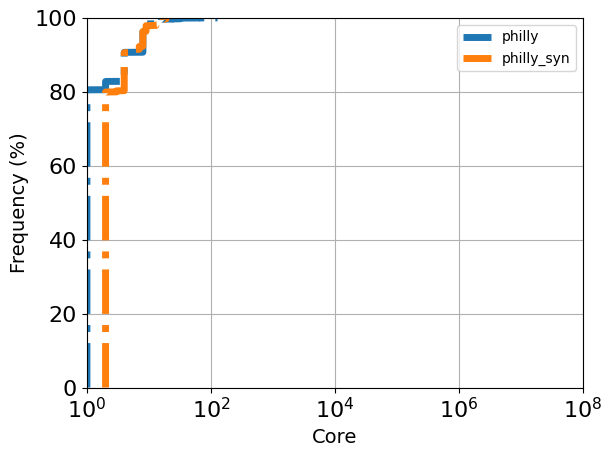

In [13]:
plot_cdf(philly_df["gpu_num"], 100000, "Core", linestyle="-.")
plot_cdf(philly_syn_df["gpu_num"], 100000, "Core", linestyle="-.")
plt.legend(["philly", "philly_syn"])
plt.xscale("log")
plt.rc('legend',fontsize=23)

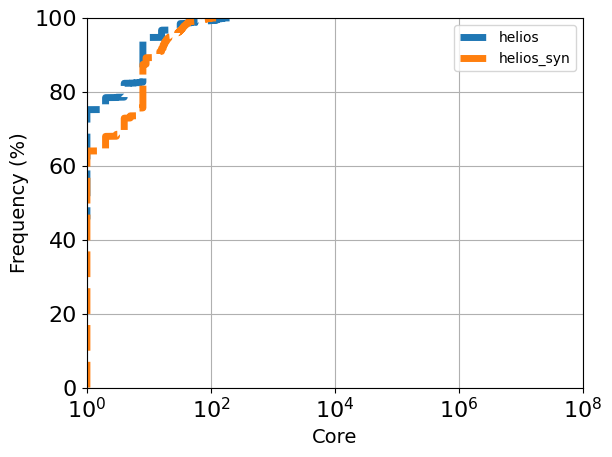

In [14]:
plot_cdf(hl_df["gpu_num"], 100000, "Core", linestyle="--")
plot_cdf(helios_syn_df["gpu_num"], 100000, "Core", linestyle="--")
plt.legend(["helios", "helios_syn"])
plt.xscale("log")
plt.rc('legend',fontsize=23)

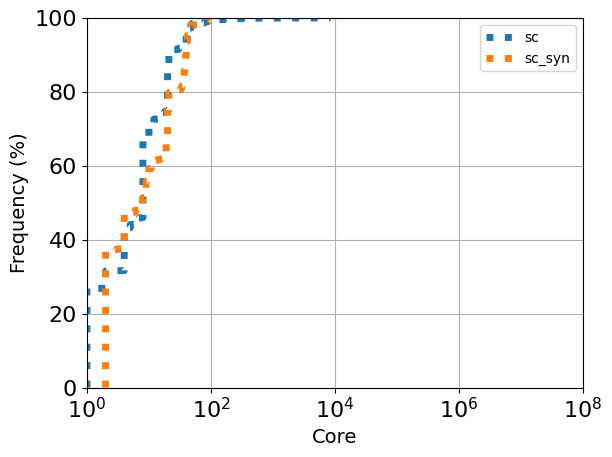

In [15]:
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in sc_df.iterrows()], 100000, "Core", linestyle=":")
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in sc_syn_df.iterrows()], 100000, "Core", linestyle=":")
plt.legend(["sc", "sc_syn"])
plt.xscale("log")
plt.rc('legend',fontsize=23)

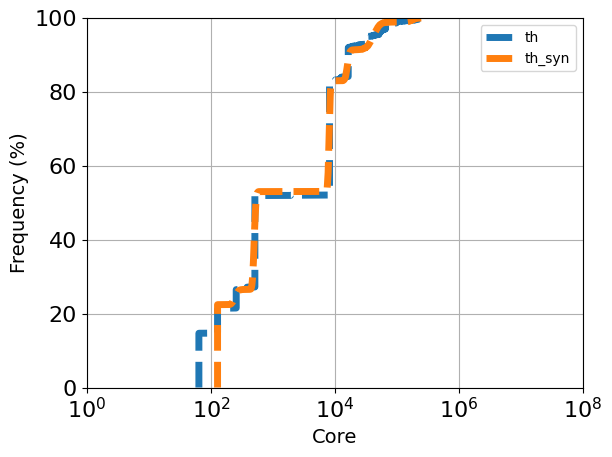

In [16]:
plot_cdf(th_df["cpu_num"], 100000, "Core", linestyle="--")
plot_cdf(th_syn_df["cpu_num"], 100000, "Core", linestyle="--")
plt.legend(["th", "th_syn"])
plt.xscale("log")
plt.rc('legend',fontsize=23)

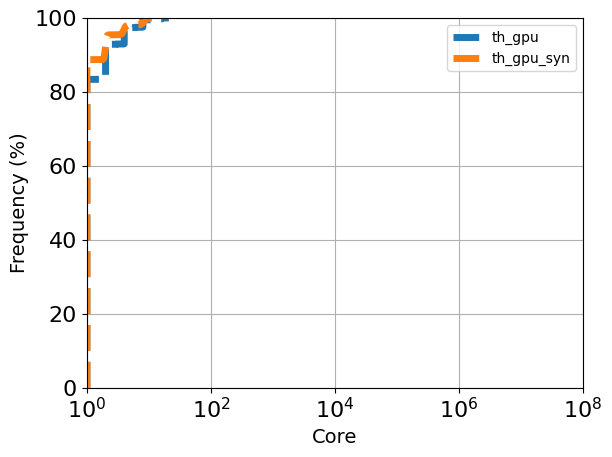

In [17]:
plot_cdf(th_gpu_df["gpu_num"], 100000, "Core", linestyle="--")
plot_cdf(th_gpu_syn_df["gpu_num"], 100000, "Core", linestyle="--")
plt.legend(["th_gpu", "th_gpu_syn"])
plt.xscale("log")
plt.rc('legend',fontsize=23)

#Run time

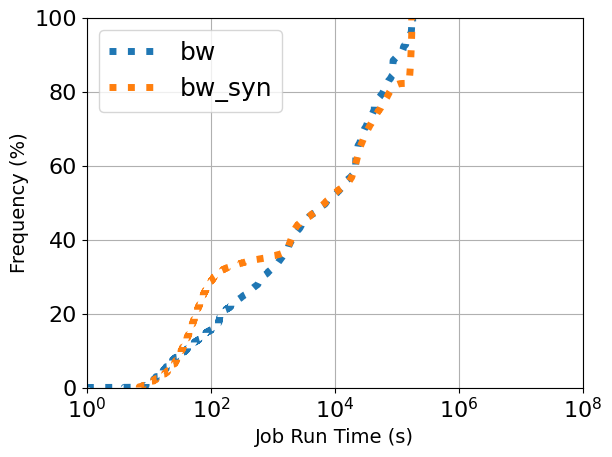

In [18]:
plt.style.use("default")
plot_cdf(bw_df["run_time"], 1000,"Job Run Time (s)", linestyle=":")
plot_cdf(bw_syn_df["run_time"], 1000,"Job Run Time (s)", linestyle=":")
plt.rc('legend',fontsize=18)
plt.legend(["bw", "bw_syn"])
plt.xscale("log")

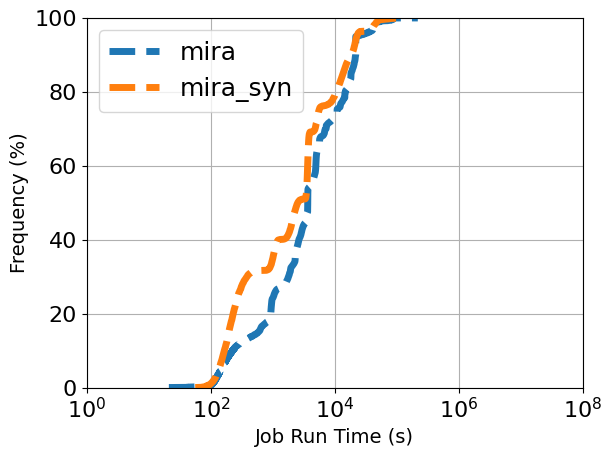

In [19]:
plt.style.use("default")
plot_cdf(mira_df_2["run_time"], 1000,"Job Run Time (s)", linestyle="--")
plot_cdf(mira_syn_df["run_time"], 1000,"Job Run Time (s)", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["mira", "mira_syn"])
plt.xscale("log")


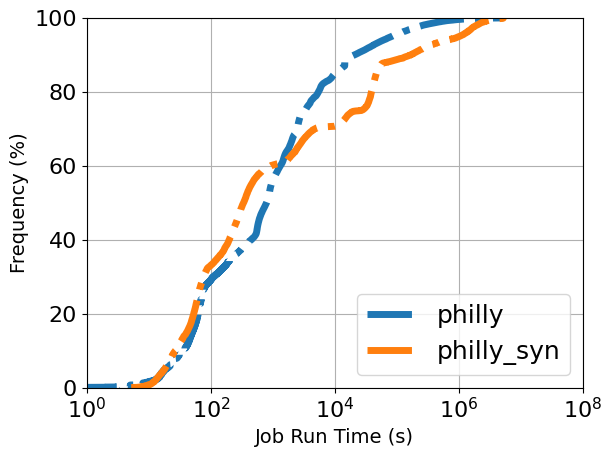

In [20]:
plt.style.use("default")
plot_cdf(philly_df["run_time"], 1000,"Job Run Time (s)", linestyle="-.")
plot_cdf(philly_syn_df["run_time"], 1000,"Job Run Time (s)", linestyle="-.")

plt.rc('legend',fontsize=18)
plt.legend(["philly", "philly_syn"])
plt.xscale("log")

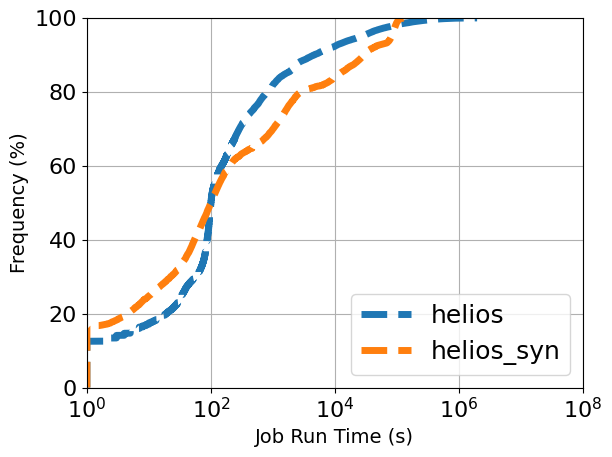

In [21]:
plt.style.use("default")
plot_cdf(hl_df["run_time"], 10009999,"Job Run Time (s)", linestyle="--")
plot_cdf(helios_syn_df["run_time"], 10009999,"Job Run Time (s)", linestyle="--")

plt.rc('legend',fontsize=18)
plt.legend(["helios", "helios_syn"])
plt.xscale("log")

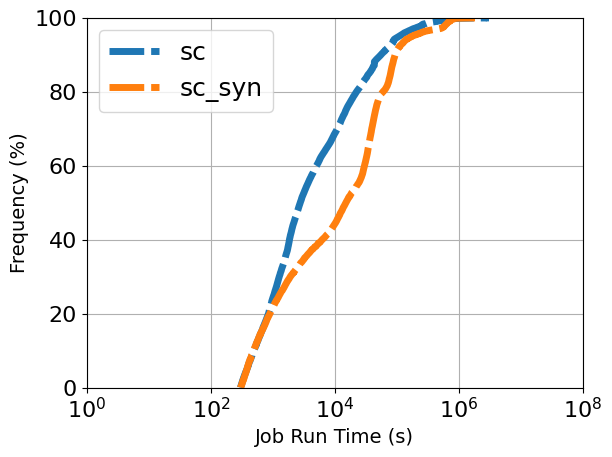

In [22]:

plt.style.use("default")
plot_cdf(sc_df["run_time"], 10009999,"Job Run Time (s)", linestyle=(1, (6,1)))
plot_cdf(sc_syn_df["run_time"], 10009999,"Job Run Time (s)", linestyle=(1, (6,1)))

plt.rc('legend',fontsize=18)
plt.legend(["sc", "sc_syn"])
plt.xscale("log")

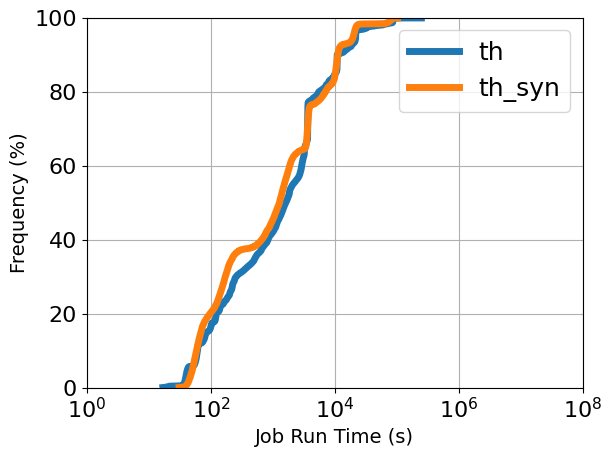

In [23]:
plt.style.use("default")
plot_cdf(th_df["run_time"], 1000, "Job Run Time (s)", linestyle="-")
plot_cdf(th_syn_df["run_time"], 1000, "Job Run Time (s)", linestyle="-")

plt.rc('legend',fontsize=18)
plt.legend(["th", "th_syn"])
plt.xscale("log")

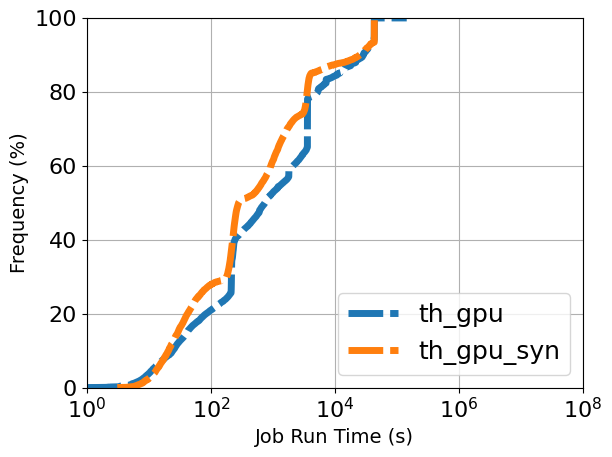

In [24]:
plt.style.use("default")
plot_cdf(th_gpu_df["run_time"], 1000, "Job Run Time (s)", linestyle=(0, (5, 1)))
plot_cdf(th_gpu_syn_df["run_time"], 1000, "Job Run Time (s)", linestyle=(0, (5, 1)))

plt.rc('legend',fontsize=18)
plt.legend(["th_gpu", "th_gpu_syn"])
plt.xscale("log")

#interval

In [26]:
def get_interval(a, peak=False):
    def get_time_of_day2(time):
        time = datetime.fromtimestamp(time)
        return (time.hour + (time.minute>30))%24
    if peak:
        z = a.apply(get_time_of_day2)
        b = a-a.shift(1)
        c = b[(z>=8) & (z<=17)]
        return c
    return a-a.shift(1)

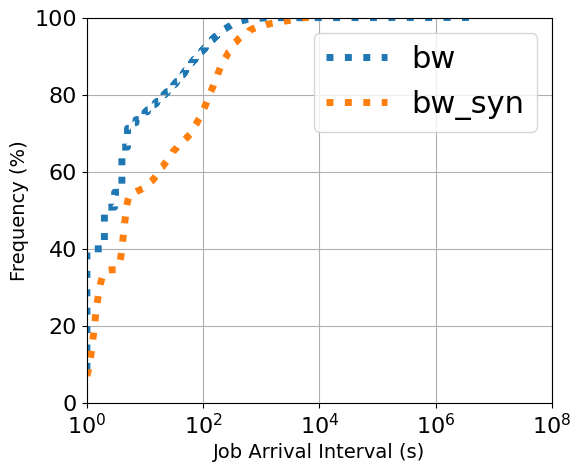

In [28]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(get_interval(bw_df["submit_time"]), 1000,"Job Arrival Interval (s)", linestyle=":")
plot_cdf(bw_syn_df["interval"], 1000,"Job Arrival Interval (s)", linestyle=":")

plt.rc('legend',fontsize=22)
plt.legend(["bw", "bw_syn"])
plt.xscale("log")

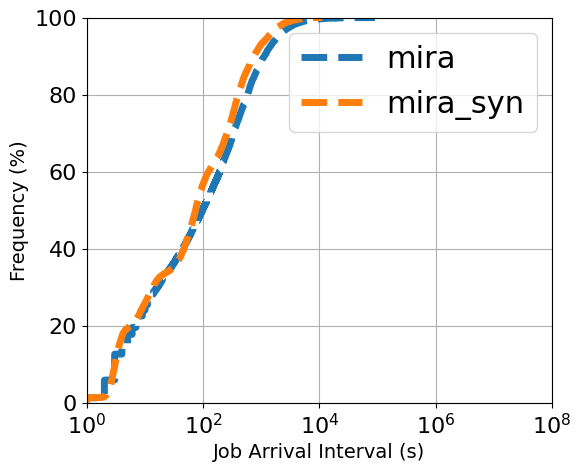

In [29]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(get_interval(mira_df_2["submit_time"]), 1000,"Job Arrival Interval (s)", linestyle="--")
plot_cdf(mira_syn_df["interval"], 1000,"Job Arrival Interval (s)", linestyle="--")

plt.rc('legend',fontsize=22)
plt.legend(["mira", "mira_syn"])
plt.xscale("log")


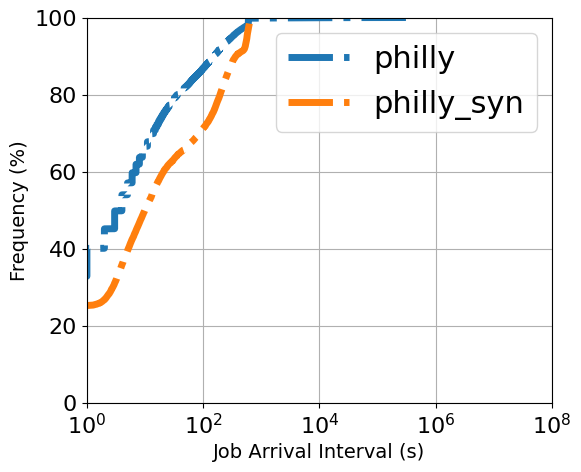

In [30]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(get_interval(philly_df["submit_time"]), 1000,"Job Arrival Interval (s)", linestyle="-.")
plot_cdf(philly_syn_df["interval"], 1000,"Job Arrival Interval (s)", linestyle="-.")

plt.rc('legend',fontsize=22)
plt.legend(["philly", "philly_syn"])
plt.xscale("log")


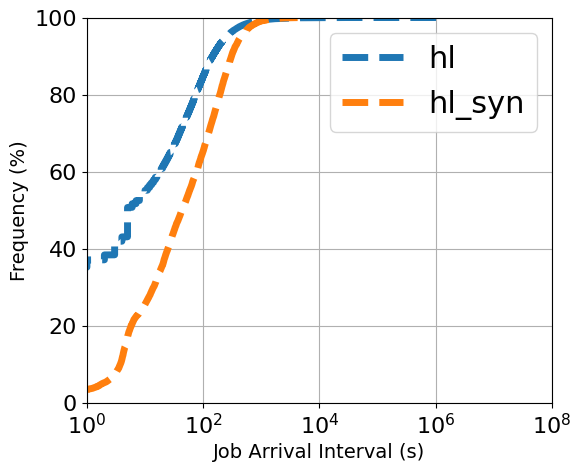

In [31]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(get_interval(hl_df["submit_time"]), 10009999,"Job Arrival Interval (s)", linestyle="--")
plot_cdf(helios_syn_df["interval"], 10009999,"Job Arrival Interval (s)", linestyle="--")

plt.rc('legend',fontsize=22)
plt.legend(["hl", "hl_syn"])
plt.xscale("log")


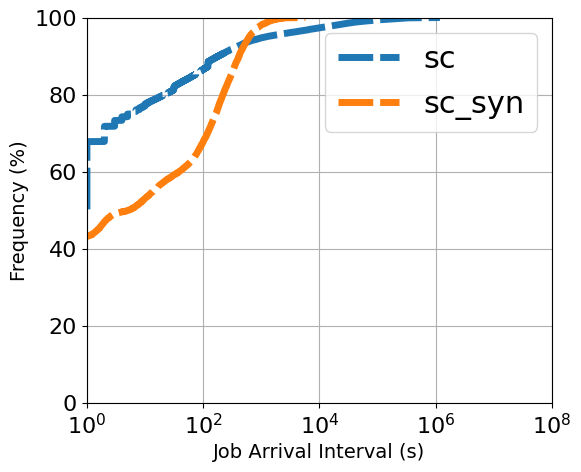

In [32]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(get_interval(sc_df["submit_time"]), 10009999,"Job Arrival Interval (s)", linestyle=(1, (6,1)))
plot_cdf(sc_syn_df["interval"], 10009999,"Job Arrival Interval (s)", linestyle=(1, (6,1)))

plt.rc('legend',fontsize=22)
plt.legend(["sc", "sc_syn"])
plt.xscale("log")

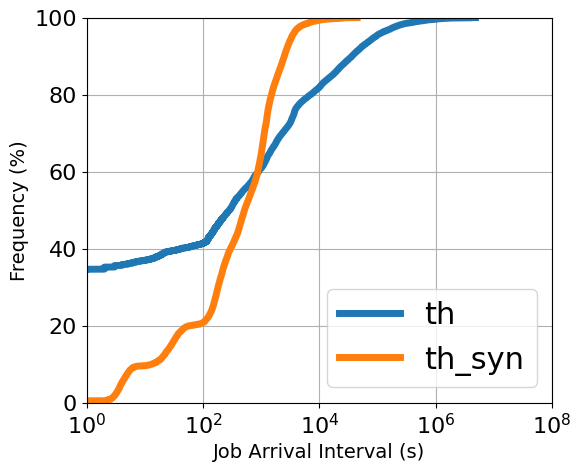

In [33]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(get_interval(th_df["submit_time"]), 100099,"Job Arrival Interval (s)", linestyle="-")
plot_cdf(th_syn_df["interval"], 100099,"Job Arrival Interval (s)", linestyle="-")
plt.rc('legend',fontsize=22)
plt.legend(["th", "th_syn"])
plt.xscale("log")

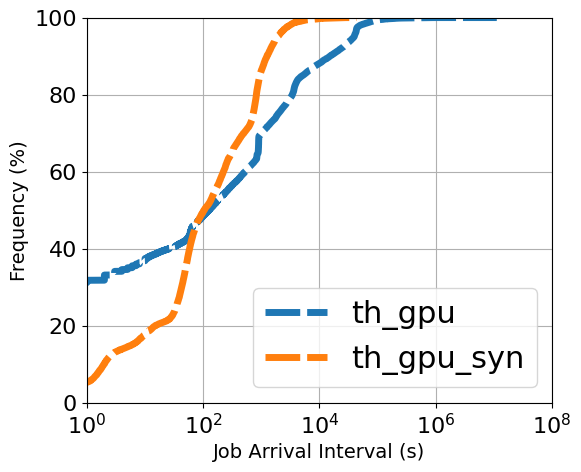

In [34]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(get_interval(th_gpu_df["submit_time"]), 100099,"Job Arrival Interval (s)", linestyle=(0, (5, 1)))
plot_cdf(th_gpu_syn_df["interval"], 100099,"Job Arrival Interval (s)", linestyle=(0, (5, 1)))

plt.rc('legend',fontsize=22)
plt.legend(["th_gpu", "th_gpu_syn"])
plt.xscale("log")